In [1]:
from pmdarima.arima import auto_arima
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
sales_data = pd.read_csv("Champagne Sales.csv")
sales_data.head()

,Month,Champagne sales
0,1964-01,2815
1,1964-02,2672
2,1964-03,2755
3,1964-04,2721
4,1964-05,2946


In [3]:
sales_data.tail()

,Month,Champagne sales
100,1972-05,4618
101,1972-06,5312
102,1972-07,4298
103,1972-08,1413
104,1972-09,5877


In [4]:
sales_data.dtypes

Month              object
Champagne sales     int64
dtype: object

In [5]:
sales_data['Month']=pd.to_datetime(sales_data['Month'])
sales_data.dtypes

Month              datetime64[ns]
Champagne sales             int64
dtype: object

In [6]:
sales_data.set_index('Month',inplace=True)
sales_data.head()

,Champagne sales
Month,
1964-01-01,2815
1964-02-01,2672
1964-03-01,2755
1964-04-01,2721
1964-05-01,2946


<AxesSubplot:xlabel='Month'>

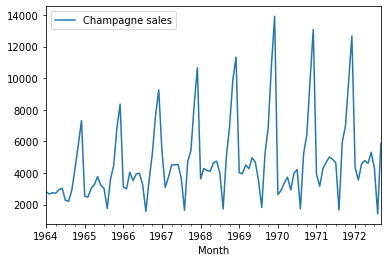

In [7]:
sales_data.plot()

In [8]:
from pmdarima.arima import ADFTest
adf_test = ADFTest(alpha = 0.05)
adf_test.should_diff(sales_data)

(0.01, False)

In [9]:
train = sales_data[:85]
test = sales_data[-20:]

In [10]:
train.tail()

,Champagne sales
Month,
1970-09-01,5221
1970-10-01,6424
1970-11-01,9842
1970-12-01,13076
1971-01-01,3934


In [11]:
test.head()

,Champagne sales
Month,
1971-02-01,3162
1971-03-01,4286
1971-04-01,4676
1971-05-01,5010
1971-06-01,4874


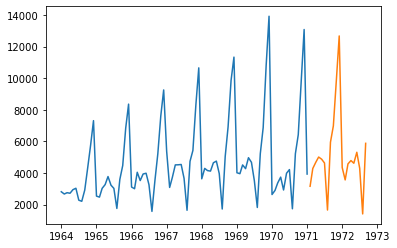

In [12]:
plt.plot(train)
plt.plot(test)

In [18]:
arima_model =  auto_arima(train,start_p=0, d=1, start_q=0, 
                          max_p=5, max_d=5, max_q=5, 
                          start_P=0, D=None, start_Q=0, 
                          max_P=5, max_D=5, max_Q=5, 
                          m=12, seasonal=True, error_action='warn',trace = True,
                          supress_warnings=True,stepwise = True,
                          random_state=20,n_fits = 50,
                         out_of_sample_size=8)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=1203.856, Time=0.12 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=1191.697, Time=0.80 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=1176.286, Time=0.76 sec
 ARIMA(0,1,1)(0,1,0)[12]             : AIC=1174.733, Time=0.22 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=1176.068, Time=0.51 sec
 ARIMA(0,1,1)(1,1,1)[12]             : AIC=1176.765, Time=0.76 sec
 ARIMA(1,1,1)(0,1,0)[12]             : AIC=1175.058, Time=0.27 sec
 ARIMA(0,1,2)(0,1,0)[12]             : AIC=1174.773, Time=0.25 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=1194.763, Time=0.12 sec
 ARIMA(1,1,2)(0,1,0)[12]             : AIC=1174.614, Time=0.39 sec
 ARIMA(1,1,2)(1,1,0)[12]             : AIC=1176.074, Time=0.78 sec
 ARIMA(1,1,2)(0,1,1)[12]             : AIC=1176.251, Time=0.95 sec
 ARIMA(1,1,2)(1,1,1)[12]             : AIC=1176.781, Time=0.90 sec
 ARIMA(2,1,2)(0,1,0)[12]             : AIC=1176.192, Time=0.39 sec
 ARIMA(1,1,3)(0,1,0

In [19]:
arima_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                   85
Model:             SARIMAX(1, 1, 2)x(0, 1, [], 12)   Log Likelihood                -583.307
Date:                             Wed, 16 Feb 2022   AIC                           1174.614
Time:                                     19:43:47   BIC                           1183.721
Sample:                                          0   HQIC                          1178.240
                                              - 85                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8352      0.159     -5.267      0.000      -1.146      -0.524
ma.L1          0.0457      0.173      0.265      0.791      -0.293       0.384
ma.L2         -0.8641      0.089     -9.681      0.000      -1.039      -0.689
sigma2      6.086e+05   7.57e+04      8.041      0.000     4.6e+05    7.57e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.05   Jarque-Bera (JB):                 8.44
Prob(Q):                              0.83   Prob(JB):                         0.01
Heteroskedasticity (H):               2.58   Skew:                            -0.10
Prob(H) (two-sided):                  0.02   Kurtosis:                         4.67
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [20]:
prediction = pd.DataFrame(arima_model.predict(n_periods = 20),index=test.index)
prediction.columns = ['predicted_sales']
prediction

,predicted_sales
Month,
1971-02-01,2762.263551
1971-03-01,3239.673966
1971-04-01,3604.320105
1971-05-01,2795.791552
1971-06-01,3851.057081
1971-07-01,4085.176042
1971-08-01,1603.571143
1971-09-01,5088.746707
1971-10-01,6289.929716


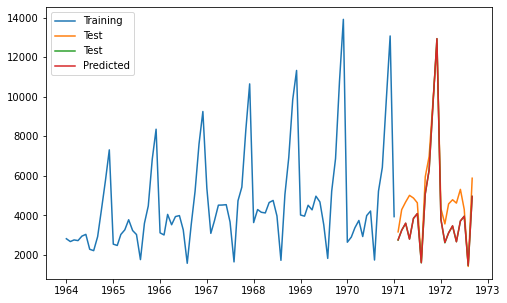

In [21]:
plt.figure(figsize=(8,5))
plt.plot(train,label="Training")
plt.plot(test,label="Test")
plt.plot(prediction,label="Predicted")
plt.legend(loc = 'upper left')
plt.show()

In [22]:
from sklearn.metrics import r2_score
test['predicted_sales'] = prediction
r2_score(test['Champagne sales'], test['predicted_sales'])

<ipython-input-22-d14264f9f9a6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['predicted_sales'] = prediction


0.812351249704071